In [249]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from scipy import stats
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.svm import SVC as svc
from sklearn.metrics import accuracy_score

In [250]:
# first let's take a look at out data!:
cepheid = pd.read_csv('/content/drive/MyDrive/cepheid')
rr = pd.read_csv('/content/drive/MyDrive/rr')
# note that I calculated distance in TOPCAT (the distance's unit is pc)

In [ ]:
cepheid.head(5)

,parallax,bp_rp,phot_g_mean_mag,pf,distance
0,0.029784,1.819353,14.647458,35.492639,33574.992149
1,0.079756,1.742755,13.918768,22.071996,12538.297713
2,0.179978,1.283184,16.318567,11.023490,5556.226754
3,0.608229,1.280787,9.726876,4.710753,1644.117886
4,0.428942,1.829424,10.142719,5.546926,2331.318090


In [ ]:
cepheid.shape

(9575, 5)

In [ ]:
rr.head(5)

,parallax,bp_rp,phot_g_mean_mag,pf,distance
0,0.973512,2.236544,20.254179,0.436169,1027.208862
1,-0.197124,1.876167,18.429874,NaN,-5072.953838
2,-0.913383,1.107197,18.429476,NaN,-1094.830407
3,NaN,0.969419,20.836376,0.616581,NaN
4,-0.408124,2.675110,20.022114,0.596615,-2450.237509


In [ ]:
rr.shape

(140784, 5)

As it is clear, we have two problems here:

1) The number of data for cepheids is not equal to rrlyrae stars

2) There are some negative parallaxes!! Although you can find some explanations about the interpretation of this amount, I will delete them for now.

In [251]:
cepheid = cepheid[cepheid.parallax>0] # deleting values with negative parallax
cepheid = cepheid.dropna() # deleting those rows which do not have a number
rr = rr[rr.parallax>0]
rr = rr.dropna()
print (cepheid.shape)
print (rr.shape)

(3344, 5)
(60317, 5)


As you can see, the number of data has declined dramatically!

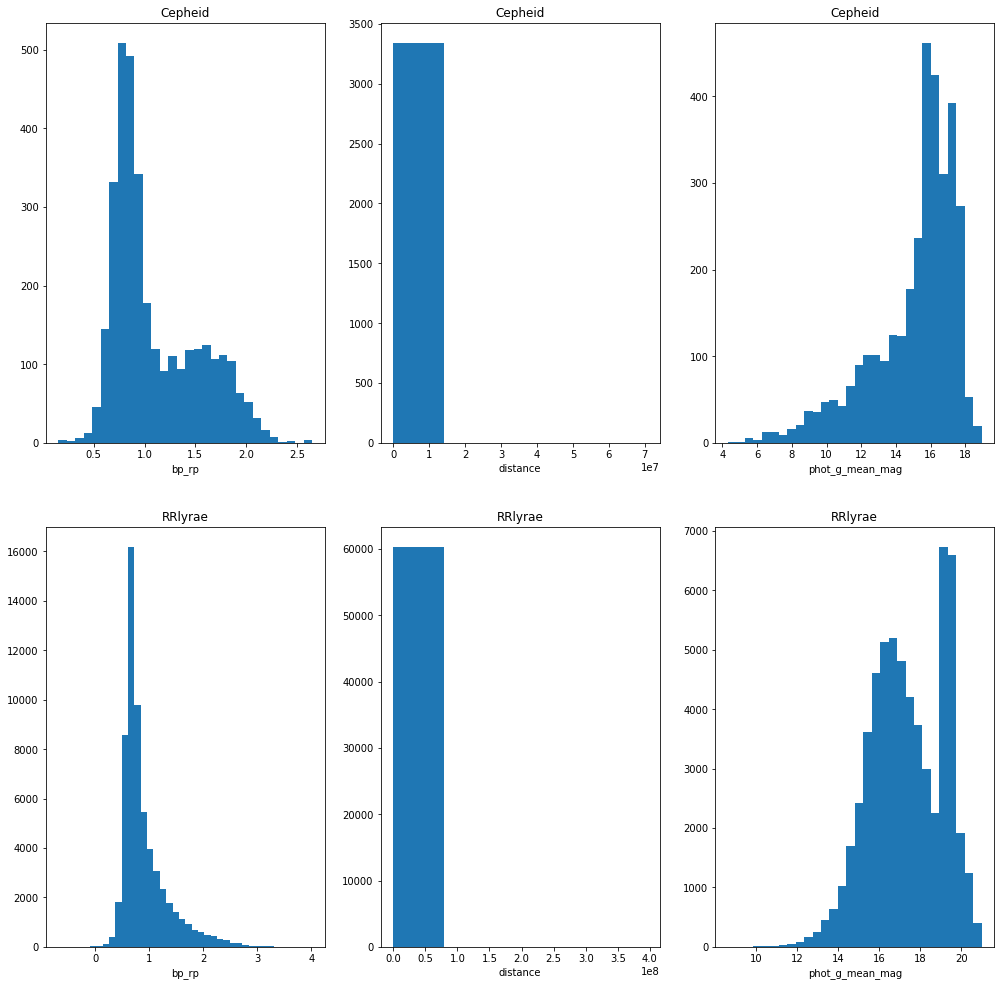

In [ ]:
# Another crucial step is to illustrate data:
plt.figure(figsize=(17,17))
plt.subplot(2,3,1)
plt.xlabel('bp_rp')
plt.title('Cepheid')
plt.hist(cepheid.bp_rp, bins = 30);

plt.subplot(2,3,2)
plt.xlabel('distance')
plt.title('Cepheid')
plt.hist(cepheid.distance, bins = 5)

plt.subplot(2,3,3)
plt.xlabel('phot_g_mean_mag')
plt.title('Cepheid')
plt.hist(cepheid.phot_g_mean_mag, bins = 30)

plt.subplot(2,3,4)
plt.xlabel('bp_rp')
plt.title('RRlyrae')
plt.hist(rr.bp_rp, bins = 30);

plt.subplot(2,3,5)
plt.xlabel('distance')
plt.title('RRlyrae')
plt.hist(rr.distance, bins = 5)

plt.subplot(2,3,6)
plt.xlabel('phot_g_mean_mag')
plt.title('RRlyrae')
plt.hist(rr.phot_g_mean_mag , bins = 30)

plt.show()

According to graphs, it is obvious that:

1) Distances are approximately the same

2) There is an obvious overlapping region for phot_g_mean_mag and bp_rp feature. 

In [ ]:
"""
lets calculate the correlation between different components of stars. It will give us some intuition about the stars feratures: """
rr.corr().style.background_gradient(cmap="Blues")

,parallax,bp_rp,phot_g_mean_mag,pf,distance
parallax,1.000000,0.155154,0.129431,-0.032489,-0.021105
bp_rp,0.155154,1.000000,0.164391,-0.075667,-0.002113
phot_g_mean_mag,0.129431,0.164391,1.000000,-0.052629,0.004163
pf,-0.032489,-0.075667,-0.052629,1.000000,-0.003363
distance,-0.021105,-0.002113,0.004163,-0.003363,1.000000


As you can see, the most relevant features are bp_rp and phot_g_mean_mag.

In [ ]:
cepheid.corr().style.background_gradient(cmap="Blues")

,parallax,bp_rp,phot_g_mean_mag,pf,distance
parallax,1.000000,0.238913,-0.409591,0.054857,-0.030642
bp_rp,0.238913,1.000000,-0.549436,0.260261,-0.014019
phot_g_mean_mag,-0.409591,-0.549436,1.000000,-0.265324,0.017705
pf,0.054857,0.260261,-0.265324,1.000000,-0.002115
distance,-0.030642,-0.014019,0.017705,-0.002115,1.000000


For cepheids, the table illustrates that there is a meaningful relation between apparent magnitude and color (about -0.5) as well as parallax. Contrary to rrlyrae stars, apparent magnitude and parallax have a negative correlation!

In [252]:
# generating labels:
class_1 = np.ones(3344 , dtype = int) # class 1 : cepheid
class_2 = np.zeros(60317 , dtype = int) # class 0 : rrlyrae
label = np.concatenate((class_1,class_2),axis = 0)
print (label.shape)

(63661,)


In [253]:
# generating data:
cepheid = np.asarray(cepheid[['bp_rp','distance','phot_g_mean_mag','pf']])
rr = np.asarray(rr[['bp_rp','distance','phot_g_mean_mag','pf']])
data = np.concatenate((cepheid , rr) , axis = 0)
print (data.shape)

(63661, 4)


In [254]:
# normalizing data (there is a function in sklearn for this, but I prefer to do this manually!)
data = (data-np.mean(data))/np.std(data)

In [255]:
# splitting data into train and test:
X_train,X_test,Y_train,Y_test = train_test_split(data,label, test_size = 0.2 , random_state = 9)
print (X_train.shape)
print (X_test.shape)

(50928, 4)
(12733, 4)


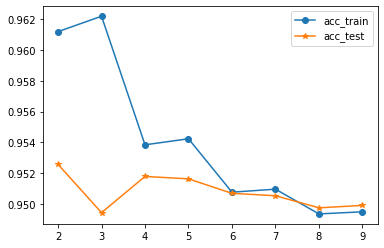

In [256]:
KN = sklearn.neighbors.KNeighborsClassifier
acc_train = []
acc_test = []
for i in range (2,10):
  clf = KN(n_neighbors=i).fit(X_train,Y_train)
  y_p = clf.predict(X_train)
  acc_tr = accuracy_score(Y_train, y_p)
  y_pp = clf.predict(X_test)
  acc_te = accuracy_score(Y_test, y_pp)
  acc_train.append(acc_tr)
  acc_test.append(acc_te)

x = range(2,10)
plt.plot(x ,acc_train, label = 'acc_train', marker = 'o')
plt.plot(x ,acc_test , label = 'acc_test', marker = '*')
plt.legend()
plt.show()

The line graph shows that the best choice for k is 2 in which acc_train is about 96% and acc_test 95%.

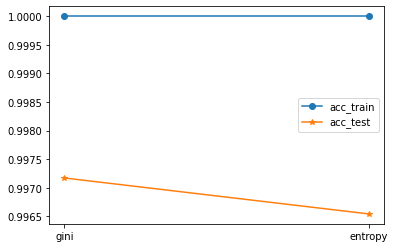

In [ ]:
criteria = ['gini' , 'entropy']
acc_train = []
acc_test = []
for i in criteria:
  clf = DT(criterion=i).fit(X_train,Y_train)
  y_p = clf.predict(X_train)
  acc_tr = accuracy_score(Y_train, y_p)
  y_pp = clf.predict(X_test)
  acc_te = accuracy_score(Y_test, y_pp)
  acc_train.append(acc_tr)
  acc_test.append(acc_te)

x = ['gini' , 'entropy']
plt.plot(x ,acc_train, label = 'acc_train', marker = 'o')
plt.plot(x ,acc_test , label = 'acc_test', marker = '*')
plt.legend()
plt.show()

Surprisingly, the decision tree's performance is excellent! So this will be our model for this purpose.